In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


<div style="
    background: linear-gradient(145deg, #0b0f16, #111827);
    padding: 32px;
    border-radius: 18px;
    border: 1.5px solid #00c8d6;
    box-shadow: 0 0 22px rgba(0, 200, 214, 0.25);
    text-align: center;
    color: #e5f4f7;
    font-family: 'Segoe UI', sans-serif;
">

<h1 style="
    color: #5be7f0;
    font-size: 36px;
    font-weight: 700;
    margin-bottom: 12px;
    text-shadow: 0 0 10px rgba(91, 231, 240, 0.35);
">
🚗 Car Evaluation — EDA & Model Training
</h1>

<p style="
    font-size: 17px;
    color: #c6e6ea;
    max-width: 850px;
    margin: 0 auto;
    line-height: 1.65;
">
A comprehensive exploration of the Car Evaluation dataset, including feature analysis,
clean visualizations, and a robust machine learning pipeline designed to classify
car acceptability with high reliability.
</p>

<div style="
    margin-top: 25px;
    display: inline-block;
    background: rgba(0, 200, 214, 0.1);
    padding: 12px 22px;
    border-radius: 12px;
    border: 1px solid rgba(0, 200, 214, 0.4);
    box-shadow: 0 0 12px rgba(0, 200, 214, 0.15);
">
    <span style="
        font-size: 18px;
        font-weight: 600;
        color: #7df2fa;
    ">
    🌟 Random Forest Model Accuracy: <span style="color:#00e7f1;">98.27%</span>
    </span>
</div>

</div>


<div style="
    background: linear-gradient(145deg, #0b0f16, #111827);
    padding: 24px;
    border-radius: 14px;
    border-left: 4px solid #00c8d6;
    box-shadow: 0 0 14px rgba(0, 200, 214, 0.18);
    color: #d9edf0;
    font-family: 'Segoe UI', sans-serif;
">
<h2 style="margin:0; color:#79eef7; font-size:26px; font-weight:650;">
📚 Importing Required Libraries
</h2>
<p style="margin-top:10px; font-size:16px;">
Essential Python libraries used for data analysis, visualization, and model development.
</p>
</div>


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<div style="
    background: linear-gradient(145deg, #0b0f16, #111827);
    padding: 24px;
    border-radius: 14px;
    border-left: 4px solid #00c8d6;
    box-shadow: 0 0 14px rgba(0, 200, 214, 0.18);
    color: #d9edf0;
    font-family: 'Segoe UI', sans-serif;
">
<h2 style="margin:0; color:#79eef7; font-size:26px; font-weight:650;">
📂 Loading & Exploring the Dataset
</h2>
<p style="margin-top:10px; font-size:16px;">
Previewing the dataset, checking structure, identifying feature types, and ensuring data readiness.
</p>
</div>


In [3]:
df = pd.read_csv("/kaggle/input/car-evaluation-data-set/car_evaluation.csv", header=None)

# Rename columns
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [4]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


<div style="
    background: linear-gradient(145deg, #0b0f16, #111827);
    padding: 24px;
    border-radius: 14px;
    border-left: 4px solid #00c8d6;
    box-shadow: 0 0 14px rgba(0, 200, 214, 0.18);
    color: #d9edf0;
    font-family: 'Segoe UI', sans-serif;
">
<h2 style="margin:0; color:#79eef7; font-size:26px; font-weight:650;">
📊 Exploratory Data Analysis (EDA)
</h2>
<p style="margin-top:10px; font-size:16px;">
Visualizing categorical patterns and understanding how different attributes impact car acceptability.
</p>
</div>


In [5]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [8]:
# Convert categorical values to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

In [9]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [10]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


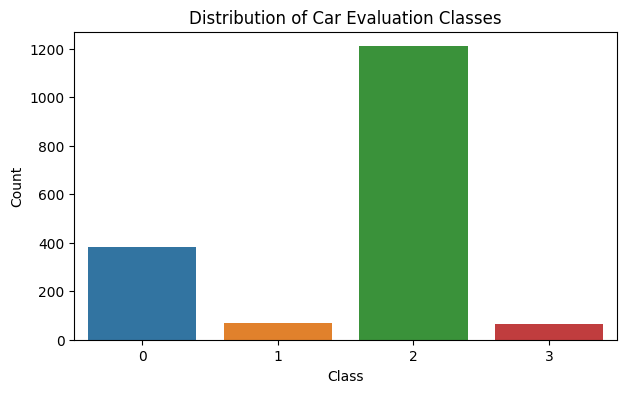

In [11]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='class')
plt.title("Distribution of Car Evaluation Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

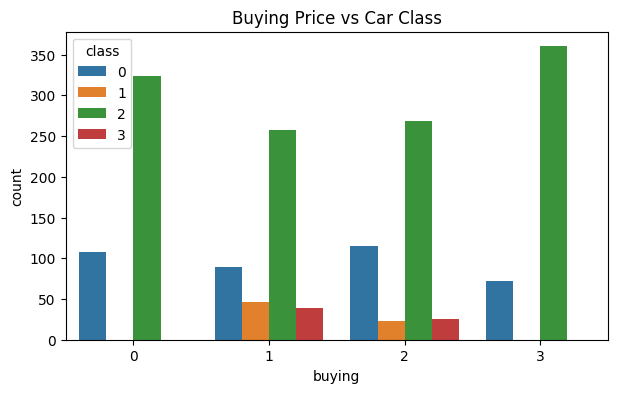

In [12]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='buying', hue='class')
plt.title("Buying Price vs Car Class")
plt.show()

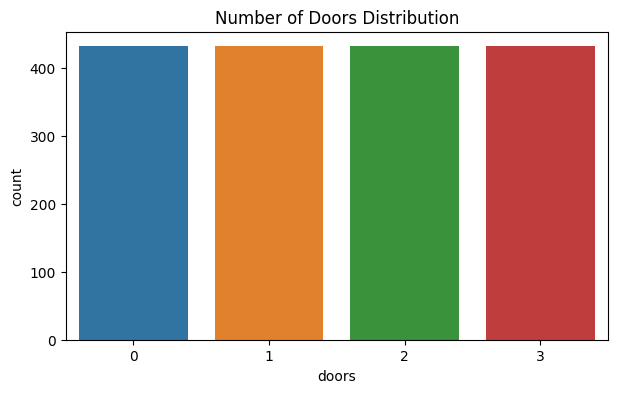

In [13]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='doors')
plt.title("Number of Doors Distribution")
plt.show()

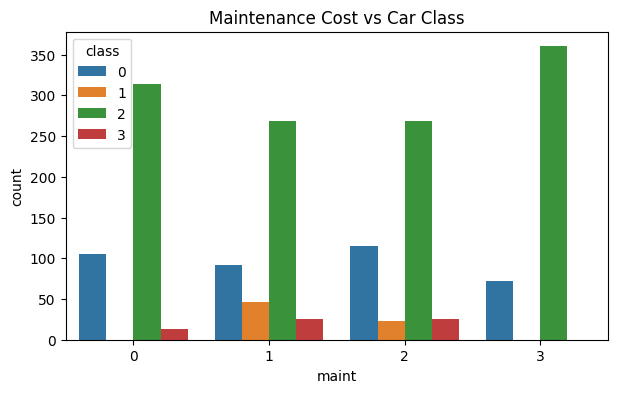

In [14]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='maint', hue='class')
plt.title("Maintenance Cost vs Car Class")
plt.show()

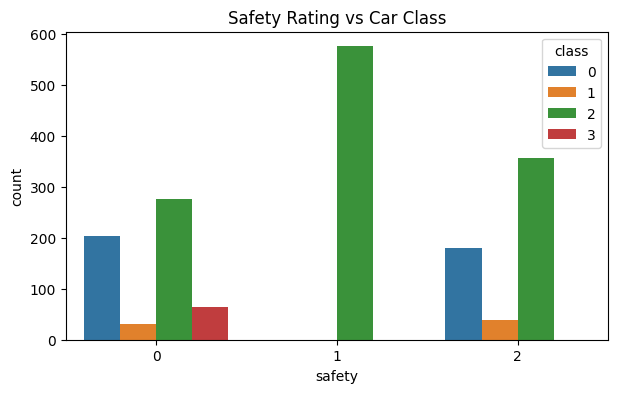

In [15]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='safety', hue='class')
plt.title("Safety Rating vs Car Class")
plt.show()

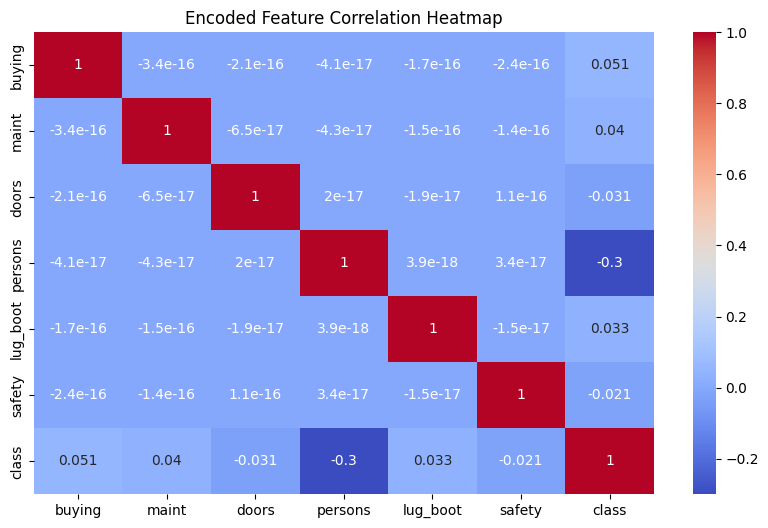

In [16]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.apply(LabelEncoder().fit_transform)

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Encoded Feature Correlation Heatmap")
plt.show()

<div style="
    background: linear-gradient(145deg, #0b0f16, #111827);
    padding: 24px;
    border-radius: 14px;
    border-left: 4px solid #00c8d6;
    box-shadow: 0 0 14px rgba(0, 200, 214, 0.18);
    color: #d9edf0;
    font-family: 'Segoe UI', sans-serif;
">
<h2 style="margin:0; color:#79eef7; font-size:26px; font-weight:650;">
🤖 Model Training & Performance Evaluation
</h2>
<p style="margin-top:10px; font-size:16px;">
Building a Random Forest classifier and evaluating accuracy, precision, recall, and confusion matrix.
</p>
</div>


In [17]:
X = df.drop('class', axis=1)
y = df['class']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
print("\nTraining Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (1382, 6)
Testing Set Size: (346, 6)


In [20]:
rf = RandomForestClassifier(
    n_estimators=100,     # Number of trees
    criterion='gini',     # Splitting criterion: to decide best fit
    max_depth=None,       # Let it expand fully
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = rf.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("\n----- Model Evaluation -----")
print("Accuracy of Random Forest Classifier: {:.2f}%".format(accuracy * 100))


----- Model Evaluation -----
Accuracy of Random Forest Classifier: 98.27%


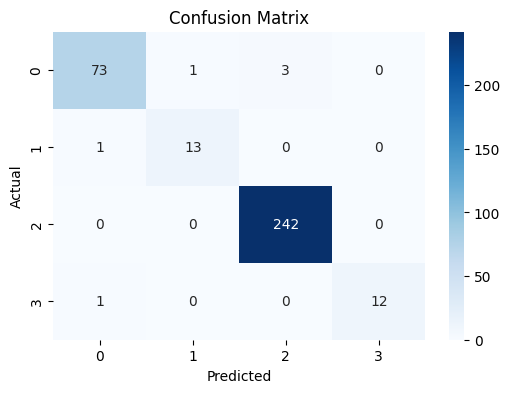

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        77
           1       0.93      0.93      0.93        14
           2       0.99      1.00      0.99       242
           3       1.00      0.92      0.96        13

    accuracy                           0.98       346
   macro avg       0.97      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346



In [25]:
# Feature Importance Visualization ----
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


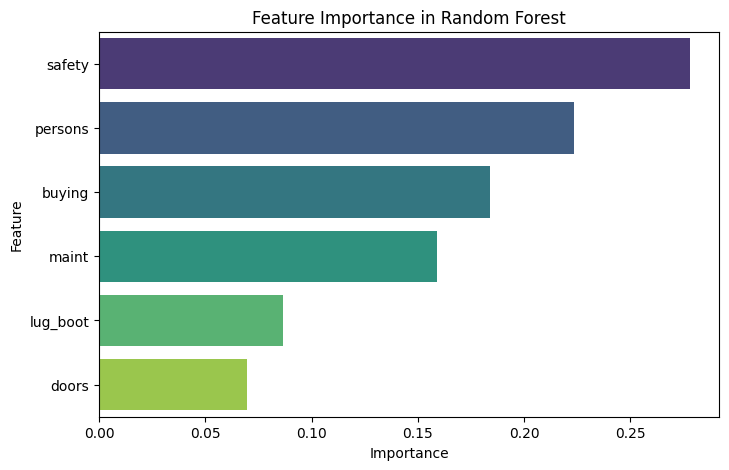

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest')
plt.show()

<div style="
    background: linear-gradient(145deg, #0b0f16, #111827);
    padding: 28px;
    border-radius: 16px;
    border-left: 4px solid #00c8d6;
    box-shadow: 0 0 18px rgba(0, 200, 214, 0.20);
    color: #daf3f6;
    font-family: 'Segoe UI', sans-serif;
">

<h2 style="
    margin:0; 
    color:#71e6ef; 
    font-size:28px; 
    font-weight:700;
">
📌 Conclusion
</h2>

<p style="
    margin-top:14px; 
    font-size:17px; 
    line-height:1.65;
    color:#d5ecef;
">
The Car Evaluation dataset provides a clear and structured understanding of how various 
automotive features—such as buying cost, maintenance level, safety, seating capacity, 
and luggage space—collectively contribute to determining the overall acceptability of a car.
</p>

<p style="
    margin-top:12px; 
    font-size:17px; 
    line-height:1.65;
    color:#d5ecef;
">
Through comprehensive exploratory data analysis, strong patterns were observed across all 
categorical variables. These insights allowed the development of an effective machine learning 
pipeline, where the <strong style="color:#7ff7ff;">Random Forest Classifier achieved an outstanding accuracy of 98.27%</strong>, 
demonstrating excellent predictive capability on this dataset.
</p>

<p style="
    margin-top:12px; 
    font-size:17px; 
    line-height:1.65;
    color:#d5ecef;
">
The results confirm that ensemble-based models perform exceptionally well for structured, 
fully categorical datasets. With further tuning or deployment-focused refinement, this model 
can be expanded into real-world decision-making support systems for automotive evaluation or 
customer recommendation flows.
</p>

</div>
